# Intro to Michaelis-Menten Kinetics

In this workbook we will introduce simple *Python* commands for exploring enzyme kinetics.

First consider the definitions of the Michaelis-Menten system. Enzyme kinetics are not simple first-order kinetics because of the saturadtion of the catalyst that is observed. The MM equation is the rate law for the following scheme.

$$ E + S \overset{K_M}{\leftrightharpoons} ES \xrightarrow [] {k_{cat}} E + P$$

The rate law is derived to be

$$ \nu = [E]_t\cdot k_{cat} \frac{[S]}{K_M + [S]} $$ 

Michaelis and Menten had no way of measuring $[E]_t$ and so they used a constant amount of enzyme solution and stated that 

$$V_{max} = [E]_t\cdot k_{cat}$$

So the famous Michaelis-menten equation is

$$ \nu = V_{max} \frac{[S]}{K_M + [S]} $$

The terms $V_{max}$ and $K_M$ can be affected by the presence of inhibitors. The code below will plot enzyme kinetics with and without an inhibitor. Examine the code and confirm my math.

In [1]:
import numpy as np 
from matplotlib import pyplot as plt

############
## Create Michaelis-Menten results from knowm Vmax and KM
############

#### Define some parameters that you can change

KM = 0.9    # mM
Vmax = 23   # uM/min

KM_with_inhibitor = 0.9    # mM
Vmax_with_inhibitor = 8    # uM/min

#### Make a list of substrate concentrations

S = np.array([0.1, 0.3, 0.5, 1.0, 2.0, 5.0])   # make a numpy array from a list of numbers.  An array of numbers can be used in math calculations. A list cannot.

#### Calculate Rates using values for inhibited and uninhibiter systems

v = Vmax * S / (KM + S)

v_inh = Vmax_with_inhibitor * S / (KM_with_inhibitor + S)



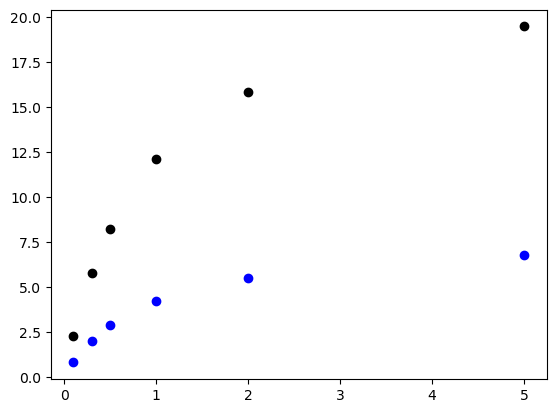

In [2]:
###############
## Plot the Data in MM plot
##############

x = S
y = v
plt.plot(x,y,"ko")

x = S
y = v_inh
plt.plot(x,y,"bo")

plt.show()

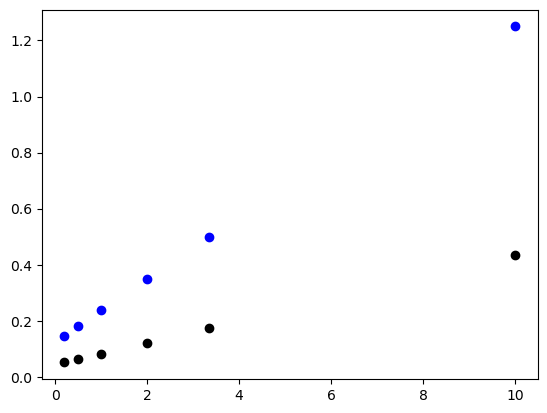

In [3]:
###############
## Plot the Data in Lineweaver-Burke plot
##############

x = 1 / S
y = 1 / v
plt.plot(x,y,"ko")

x = 1 / S
y = 1 / v_inh
plt.plot(x,y,"bo")

plt.show()

nks.

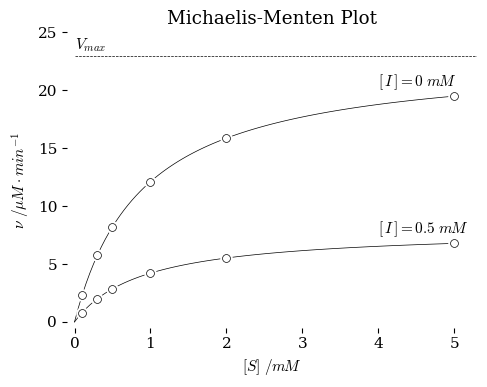

In [4]:
############
## The rest of this code makes the plots fancier. Just steal it and use it
############

## fancy plot style sheet
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
plt.style.use(github_location_styles + "tufte.mplstyle")        

## Smoother data sets for lines
S_smooth_list = np.linspace(0, np.max(S), 100)                # Make a smooth set of substrate values for plotting the curve smoothly.
v_smooth = Vmax * S_smooth_list / (KM + S_smooth_list)        # Claulate the rates using this high-resolution list for smooth curves.
v_inh_smooth = Vmax_with_inhibitor * S_smooth_list / (KM_with_inhibitor + S_smooth_list)

## Create plot with settings
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)

ax.set(
       title="Michaelis-Menten Plot",       
       ylabel=r"$\nu \ /\mu M \cdot min^{-1}$", 
       xlabel=r"$[S] \ /m\!M$",                
      xlim=[-0.1,5.3],                  
      ylim=[-0.5,25]
        )

############

x = S
y = v
ax.scatter(x,y, s=64, color="white", marker='o', zorder=3)
ax.scatter(x,y, s=32, color="white", edgecolor="black", marker='o', linewidths = 0.5, zorder=3)

x = S_smooth_list
y = v_smooth

ax.plot(x,y,"k-", linewidth = 0.5)
plt.text(np.max(x)-1,np.max(y)+0.4 + 0.5,"$[\,I\,]=0\ m\!M$")


############

x = S
y = v_inh
ax.scatter(x,y, s=64, color="white", marker='o', zorder=3)
ax.scatter(x,y, s=32, color="white", edgecolor="black", marker='o', linewidths = 0.5, zorder=3)

x = S_smooth_list
y = v_inh_smooth

ax.plot(x,y,"k-", linewidth = 0.5)
plt.text(np.max(x)-1,np.max(y)+0.4 + 0.5,"$[\,I\,]=0.5\ m\!M$")



ax.hlines(Vmax,0,6, linestyle="--", linewidths = 0.5)
plt.text(0,Vmax + 0.5,"$V_{max}$")

plt.show()

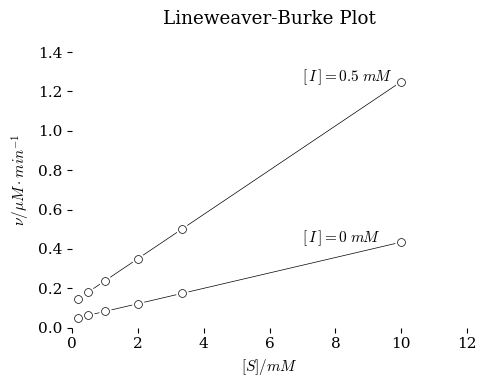

In [5]:
############
## The rest of this code makes the plots fancier. Just steal it and use it
############

## fancy plot style sheet
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
plt.style.use(github_location_styles + "tufte.mplstyle")        

## Smoother data sets for lines
S_smooth_list = np.linspace(np.min(S), np.max(S), 100)                # Make a smooth set of substrate values for plotting the curve smoothly.
v_smooth = Vmax * S_smooth_list / (KM + S_smooth_list)        # Claulate the rates using this high-resolution list for smooth curves.
v_inh_smooth = Vmax_with_inhibitor * S_smooth_list / (KM_with_inhibitor + S_smooth_list)

## Create plot with settings
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)
ax.set(
       title="Lineweaver-Burke Plot",       
       ylabel=r"$\nu /\mu M \cdot min^{-1}$", 
       xlabel=r"$[S] /mM$",                
      xlim=[0,12],                  
      ylim=[0,1.5]
        )

############

x = 1 / S
y = 1 / v
ax.scatter(x,y, s=64, color="white", marker='o', zorder=3)
ax.scatter(x,y, s=32, color="white", edgecolor="black", marker='o', linewidths = 0.5, zorder=3)
plt.text(np.max(x)-3,np.max(y),"$[\,I\,]=0\ m\!M$")


x = 1 / S_smooth_list
y = 1 / v_smooth

ax.plot(x,y,"k-", linewidth = 0.5)

############

x = 1 / S
y = 1 / v_inh
ax.scatter(x,y, s=64, color="white", marker='o', zorder=3)
ax.scatter(x,y, s=32, color="white", edgecolor="black", marker='o', linewidths = 0.5, zorder=3)
plt.text(np.max(x)-3,np.max(y),"$[\,I\,]=0.5\ m\!M$")

x = 1 / S_smooth_list
y = 1 / v_inh_smooth

ax.plot(x,y,"k-", linewidth = 0.5)



plt.show()